In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [80]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [81]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

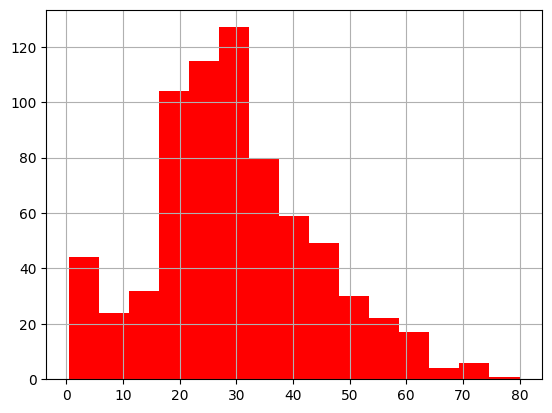

In [82]:
train_df['Age'].hist(bins=15, color='red')

In [83]:
train_df['Age'].median(skipna=True)

28.0

<Axes: xlabel='Embarked', ylabel='count'>

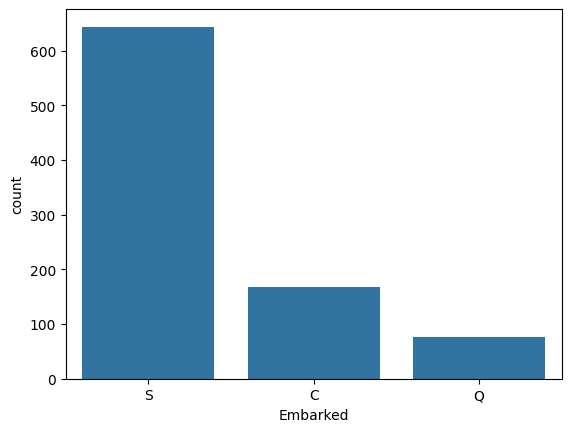

In [84]:
sns.countplot(x='Embarked', data = train_df)

In [85]:
train_data = train_df.copy()

In [86]:
train_data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [87]:
train_data['Age'] = train_data['Age'].fillna(train_df['Age'].median(skipna=True))

train_data['Embarked'] = train_data['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax())

train_data.drop('Cabin', axis=1, inplace=True)
#train_data = train_data.drop('Cabin', axis=1)

In [88]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [89]:
train_data['travel_alone'] = np.where((train_data['SibSp'] + train_data['Parch']) > 0, 0, 1)

In [90]:
train_data = train_data.drop(['SibSp', 'Parch', 'PassengerId', 'Name', 'Ticket'], axis=1)

In [91]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [92]:
train_data = pd.get_dummies(train_data, columns=['Pclass', 'Embarked', 'Sex', 'travel_alone'])

In [93]:
train_data = train_data.drop(['Sex_male', 'travel_alone_0'], axis=1)



In [94]:
train_data

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,travel_alone_1
0,0,22.0,7.2500,False,False,True,False,False,True,False,False
1,1,38.0,71.2833,True,False,False,True,False,False,True,False
2,1,26.0,7.9250,False,False,True,False,False,True,True,True
3,1,35.0,53.1000,True,False,False,False,False,True,True,False
4,0,35.0,8.0500,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,False,True,False,False,False,True,False,True
887,1,19.0,30.0000,True,False,False,False,False,True,True,True
888,0,28.0,23.4500,False,False,True,False,False,True,True,False
889,1,26.0,30.0000,True,False,False,True,False,False,False,True


In [95]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [96]:
test_data = test_df.copy()

In [97]:
test_data['Age'] = test_data['Age'].fillna(train_df['Age'].median(skipna=True))

test_data['Fare'] = test_data['Fare'].fillna(train_df['Fare'].median(skipna=True))

test_data.drop('Cabin', axis=1, inplace=True)

test_data['travel_alone'] = np.where((test_data['SibSp'] + test_data['Parch']) > 0, 0, 1)

test_data = test_data.drop(['SibSp', 'Parch', 'PassengerId', 'Name', 'Ticket'], axis=1)

test_data = pd.get_dummies(test_data, columns=['Pclass', 'Embarked', 'Sex', 'travel_alone'])

test_data = test_data.drop(['Sex_male', 'travel_alone_0'], axis=1)

test_data

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,travel_alone_1
0,34.5,7.8292,False,False,True,False,True,False,False,True
1,47.0,7.0000,False,False,True,False,False,True,True,False
2,62.0,9.6875,False,True,False,False,True,False,False,True
3,27.0,8.6625,False,False,True,False,False,True,False,True
4,22.0,12.2875,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
413,28.0,8.0500,False,False,True,False,False,True,False,True
414,39.0,108.9000,True,False,False,True,False,False,True,True
415,38.5,7.2500,False,False,True,False,False,True,False,True
416,28.0,8.0500,False,False,True,False,False,True,False,True


In [98]:
final_train = train_data.copy()
final_test = test_data.copy()

In [99]:
final_train.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'travel_alone_1'],
      dtype='object')

In [100]:
final_test.columns

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'travel_alone_1'],
      dtype='object')

In [101]:
feature_cols = final_test.columns

In [102]:
X = final_train[feature_cols]
y = final_train['Survived']

model = LogisticRegression()
logr = model.fit(X, y)



In [103]:
y_pred = logr.predict(X)
accuracy_score(y_pred, y)


0.7934904601571269

In [104]:
final_test.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,travel_alone_1
0,34.5,7.8292,False,False,True,False,True,False,False,True
1,47.0,7.0000,False,False,True,False,False,True,True,False
2,62.0,9.6875,False,True,False,False,True,False,False,True
3,27.0,8.6625,False,False,True,False,False,True,False,True
4,22.0,12.2875,False,False,True,False,False,True,True,False


In [106]:
final_test['Survived'] = logr.predict(final_test[feature_cols])


In [110]:
1 - final_train['Survived'].sum()/891

0.6161616161616161

In [107]:
final_test

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,travel_alone_1,Survived
0,34.5,7.8292,False,False,True,False,True,False,False,True,0
1,47.0,7.0000,False,False,True,False,False,True,True,False,0
2,62.0,9.6875,False,True,False,False,True,False,False,True,0
3,27.0,8.6625,False,False,True,False,False,True,False,True,0
4,22.0,12.2875,False,False,True,False,False,True,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,8.0500,False,False,True,False,False,True,False,True,0
414,39.0,108.9000,True,False,False,True,False,False,True,True,1
415,38.5,7.2500,False,False,True,False,False,True,False,True,0
416,28.0,8.0500,False,False,True,False,False,True,False,True,0
